<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>


In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

// needed to generate the Table of contents 
// taken from github.com/kmahelona/ipython_notebook_goodies

<IPython.core.display.Javascript object>

In [4]:
#To work with Atom and Jupyter at the same time

%load_ext autoreload
%autoreload 2

# Data Warngling
## Data Collection
See Importing data.ipynb

## Data Organization
All data files are stored in the Data folder. The raw file has been downloaded in the data/raw/ folder.

## Data Definition


In [5]:
import pandas as pd
import os

os.chdir('..')
print(os.getcwd())

/home/andrea/Dropbox/PyProjects/Predictive_Maintenance_Fanjet


In [6]:
filename = 'data/train.csv' 
#try also 'data/test.csv' and 'data/RUL.csv' for similar results

df = pd.read_csv(filename)

In [7]:
df.head(5)

,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,dataset
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,FD003
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,FD003
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,FD003
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,FD003
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,FD003


In [8]:
df.dtypes

unit_number       int64
cycle_time        int64
op_setting_1    float64
op_setting_2    float64
op_setting_3    float64
s1              float64
s2              float64
s3              float64
s4              float64
s5              float64
s6              float64
s7              float64
s8              float64
s9              float64
s10             float64
s11             float64
s12             float64
s13             float64
s14             float64
s15             float64
s16             float64
s17               int64
s18               int64
s19             float64
s20             float64
s21             float64
dataset          object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160359 entries, 0 to 160358
Data columns (total 27 columns):
unit_number     160359 non-null int64
cycle_time      160359 non-null int64
op_setting_1    160359 non-null float64
op_setting_2    160359 non-null float64
op_setting_3    160359 non-null float64
s1              160359 non-null float64
s2              160359 non-null float64
s3              160359 non-null float64
s4              160359 non-null float64
s5              160359 non-null float64
s6              160359 non-null float64
s7              160359 non-null float64
s8              160359 non-null float64
s9              160359 non-null float64
s10             160359 non-null float64
s11             160359 non-null float64
s12             160359 non-null float64
s13             160359 non-null float64
s14             160359 non-null float64
s15             160359 non-null float64
s16             160359 non-null float64
s17             160359 non-null int64
s18            

Dataset is very clean. There aren't any null values.

In [10]:
df.nunique()

unit_number       260
cycle_time        543
op_setting_1      670
op_setting_2      111
op_setting_3        2
s1                  6
s2               1799
s3              15377
s4              20582
s5                  6
s6                 56
s7               6311
s8               1163
s9              34161
s10                21
s11               771
s12              5982
s13               567
s14             20090
s15             13124
s16                 2
s17                58
s18                 6
s19                 2
s20               676
s21             26659
dataset             4
dtype: int64

In [11]:
df['op_setting_3'].value_counts()

100.0    143218
60.0      17141
Name: op_setting_3, dtype: int64

It looks like op_setting_3 is either 60 or 100 (probably a ercentage value).

In [12]:
df['dataset'].value_counts()

FD004    61249
FD002    53759
FD003    24720
FD001    20631
Name: dataset, dtype: int64

As we know dataset takes 4 values FD001, FD002, FD003, FD004

In [13]:
df['s19'].value_counts()

100.00    143218
84.93      17141
Name: s19, dtype: int64

Other columns with few unique vlaues are not very meaningful

In [14]:
df.aggregate(['min', 'max']).T

,min,max
unit_number,1,260
cycle_time,1,543
op_setting_1,-0.0087,42.008
op_setting_2,-0.0006,0.842
op_setting_3,60,100
s1,445,518.67
s2,535.48,645.11
s3,1242.67,1616.91
s4,1023.77,1441.49
s5,3.91,14.62


In [15]:
df.describe()

,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,...,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,105.553758,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,...,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700
std,72.867325,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,...,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067
min,1.000000,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,...,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500
25%,44.000000,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,...,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300
50%,89.000000,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,...,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500
75%,164.000000,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,...,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600
max,260.000000,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,...,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500


## Data Cleaning

As we saw there are no missing values in this dataset.

In [16]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,unit_number,cycle_time,op_setting_1,op_setting_2,op_setting_3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,dataset


There are also no duplicate rows. This is expected. 

### Outlier Check

Plotting Boxplots for each variable and each time-series will be too time consuming and generate too many plots. We can use a more succint method by calculating the IQR-score for each variable in each time-series, to weed out the timeseries which show no outliers. If a Time-Series has a datapoint smaller or larger than 1.5 the IQR range we will plot a boxplot and scatter plot to investigate.

In [83]:
# iterate over single time-series: one dataset, one unit_number 
for dataset in df["dataset"].unique() :
    allowed_unit_numbers = df[df["dataset"] == dataset]["unit_number"].unique()
    for u_n in allowed_unit_numbers :
        time_series = df[(df["dataset"] == dataset) & (df["unit_number"] == u_n)]
        Q1 = time_series.quantile(0.25)
        Q3 = time_series.quantile(0.75)
        IQR = Q3 - Q1
        #print(IQR)
        print(time_series < (Q1 - 1.5 * IQR)) |(time_series > (Q3 + 1.5 * IQR))

TypeError: Could not operate array([nan]) with block values unorderable types: str() < float()

op_setting_1 -0.0052499999999999995
outliers_FD001_u_n_5_op_setting_1.png
s6 21.61
outliers_FD001_u_n_5_s6.png
s7 551.6400000000001
outliers_FD001_u_n_5_s7.png
s12 520.2749999999999
outliers_FD001_u_n_5_s12.png
s20 38.42
outliers_FD001_u_n_5_s20.png
s21 23.04085
outliers_FD001_u_n_5_s21.png


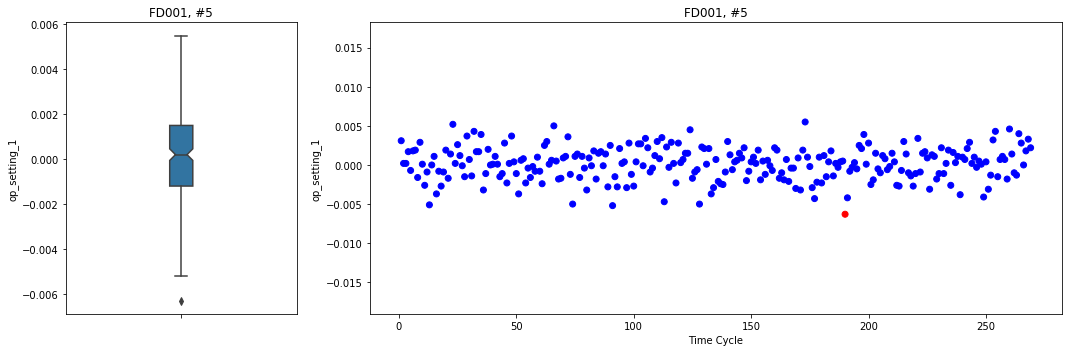

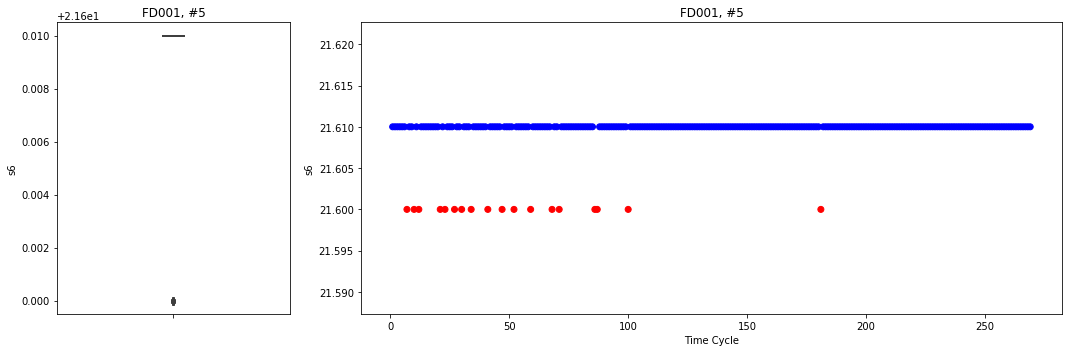

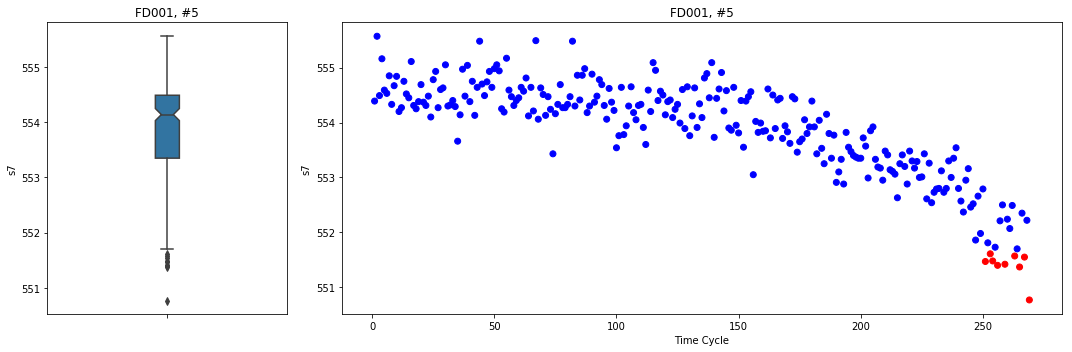

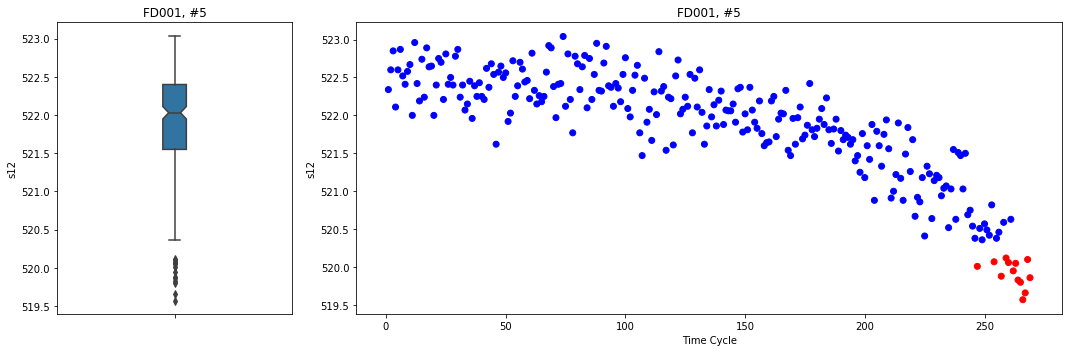

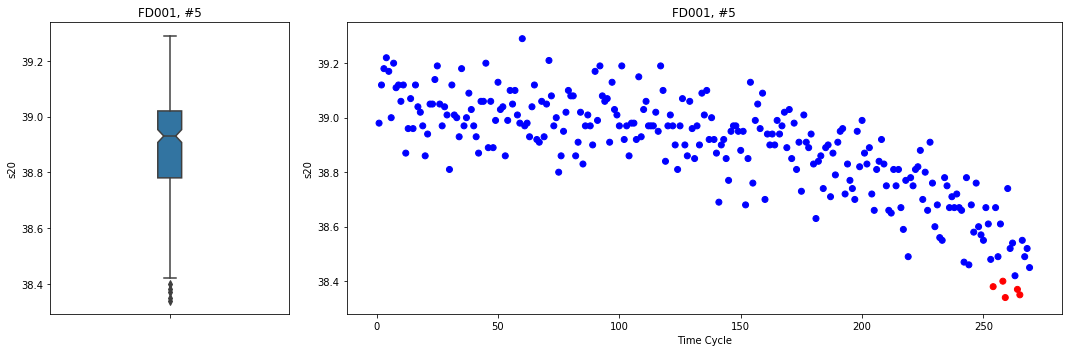

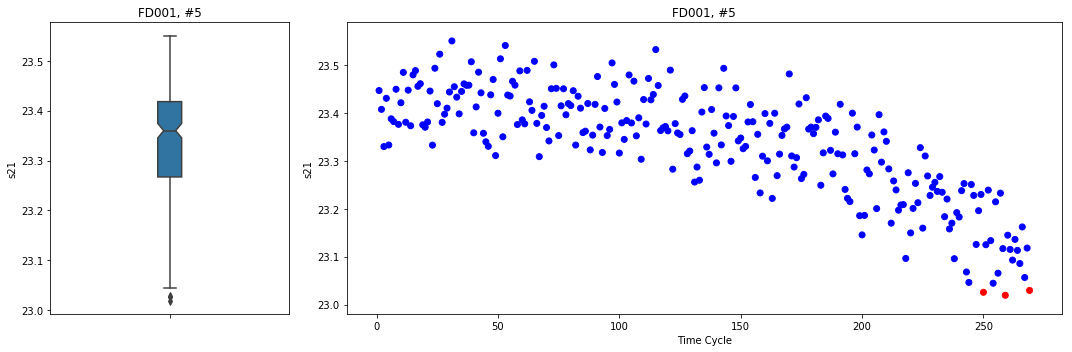

In [173]:
from matplotlib import gridspec

# debug on single time-series
time_series = df[(df["dataset"] == 'FD001') & (df["unit_number"] == 5)]
#print(type(time_series))
#print(time_series.describe())
Q1 = time_series.quantile(0.25)
Q3 = time_series.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

for col_name, lower_val in lower.items():
    #print(col_name, lower_val)
    outlier = time_series[col_name] < lower_val
    if sum(outlier) > 0 :
        print(col_name, lower_val)
        #print(time_series[col_name])
        _ = plt.figure(figsize=(15,5))
        gs = gridspec.GridSpec(1, 2, width_ratios=[1, 3]) 
        ax0 = plt.subplot(gs[0])
        ax0 = plt.title('FD001, #5')
        ax0 = sns.boxplot(x=col_name, data=time_series, orient='v',notch=True, width=0.1)
        ax1 = plt.subplot(gs[1])
        ax1 = plt.title('FD001, #5')
        ax1 = plt.scatter(time_series['cycle_time'], time_series[col_name],c=outlier, cmap=plt.cm.bwr)
        ax1 = plt.xlabel('Time Cycle')
        ax1 = plt.ylabel(col_name)
        
        plt.tight_layout()
        filename = 'outliers_'+'FD001_'+'u_n_5_'+col_name+'.png'
        print(filename)
        #plt.savefig('grid_figure.pdf')

In [ ]:

#Calculating the IQR-Score
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ValueError: Neither the `x` nor `y` variable appears to be numeric.

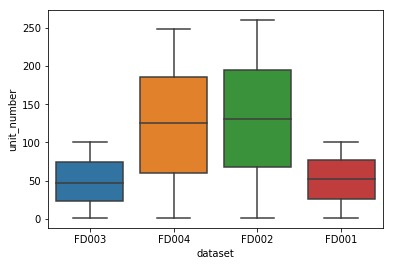

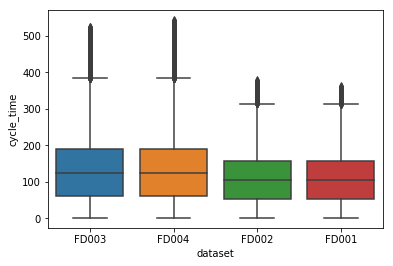

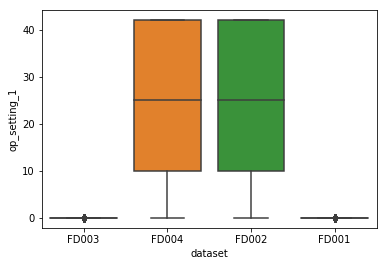

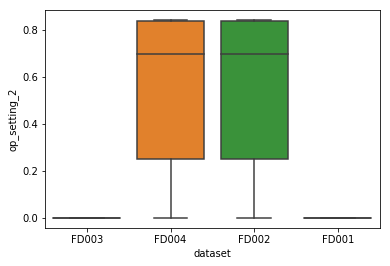

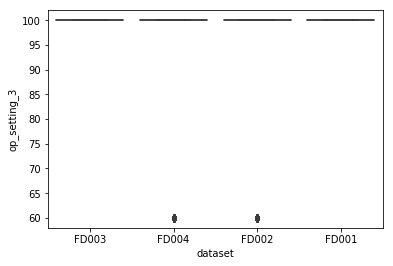

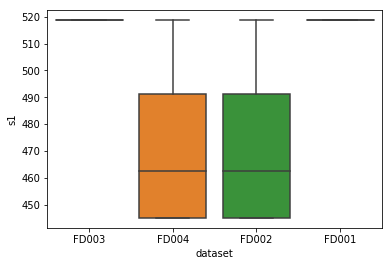

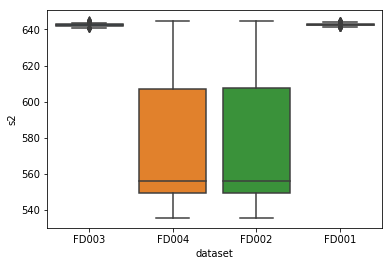

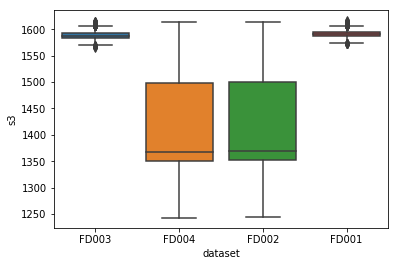

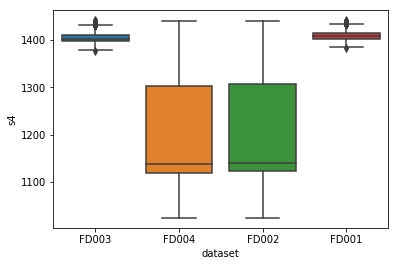

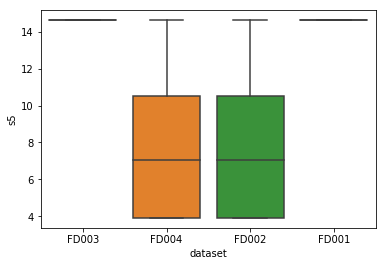

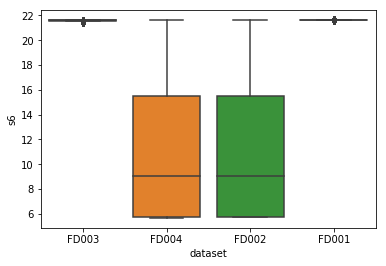

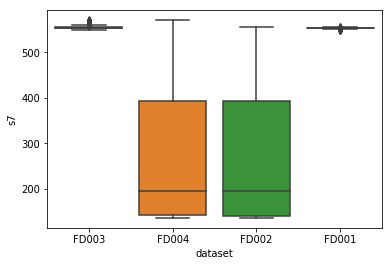

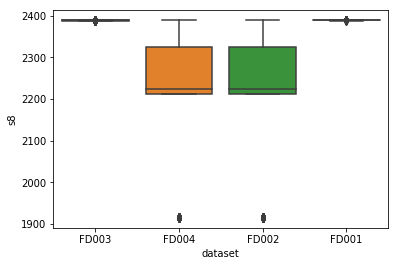

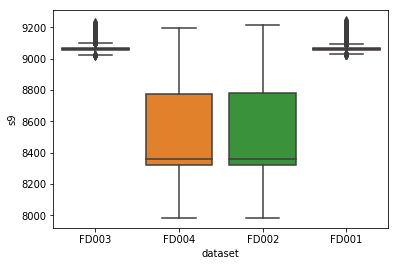

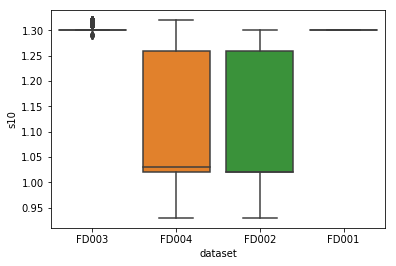

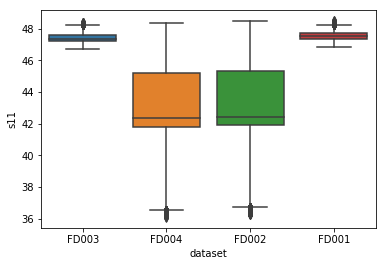

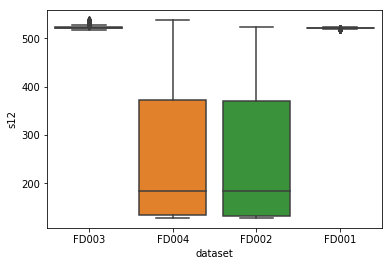

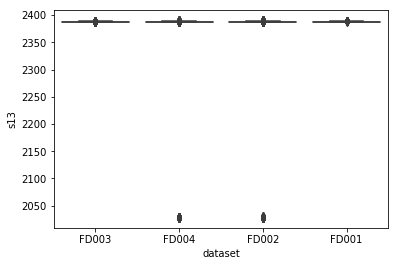

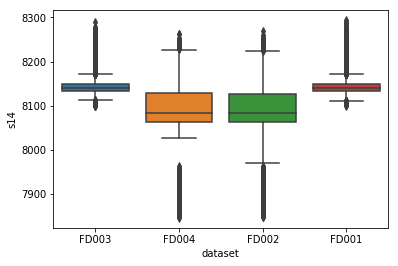

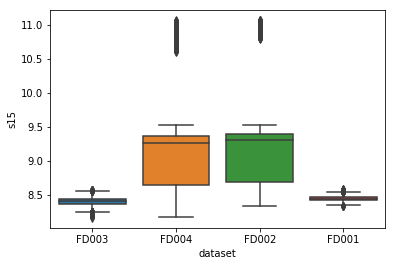

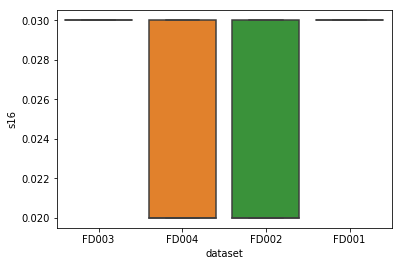

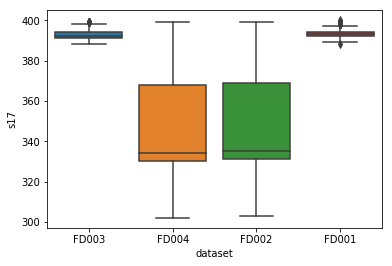

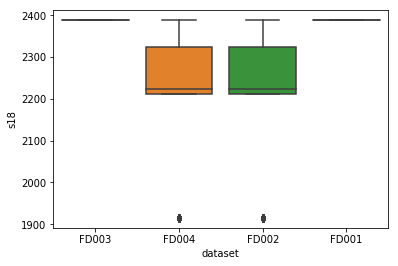

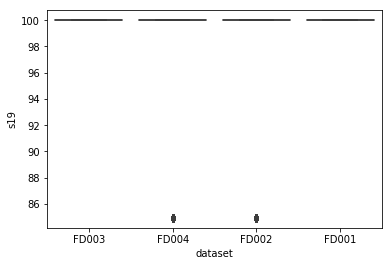

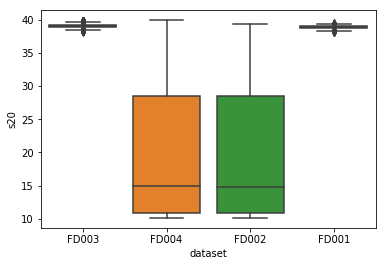

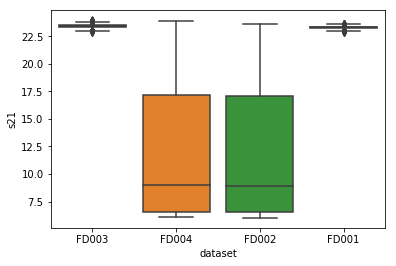

<Figure size 432x288 with 0 Axes>

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in list(df) :
    _ = plt.figure()
    _ = sns.boxplot(x='dataset', y=col, data=df)
    




No changes to the data set are needed. It's ready to be analyzed.

(The same analysis has been done on train.csv, test.csv and RUL.csv. The same conclusion was reached)
